In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_data(typ="means", N=100, nbs=30):
    true_fname = f"true_jsds_{typ}_N_{N}_nbins_{nbs}.npy"
    est_fname = f"estimated_jsds_{typ}_N_{N}_nbins_{nbs}.npy"
    # check that files exist
    try:
        true_jsds = np.load(true_fname)
    except FileNotFoundError:
        print(f"File {true_fname} not found")
        return None, None
    try:
        est_jsds = np.load(est_fname)
    except FileNotFoundError:
        print(f"File {est_fname} not found")
        return true_jsds, None
    return true_jsds, est_jsds

In [18]:
N_arr = [500, 1000, 5000, 10000, 50000, 100000]
bins_arr = [15, 15, 25, 30, 30, 35]
typ_arr = ["vars"]
palette = ["#2E4854", "#C98769", "#A1553A", "#557B82", "#BAB2A9"]

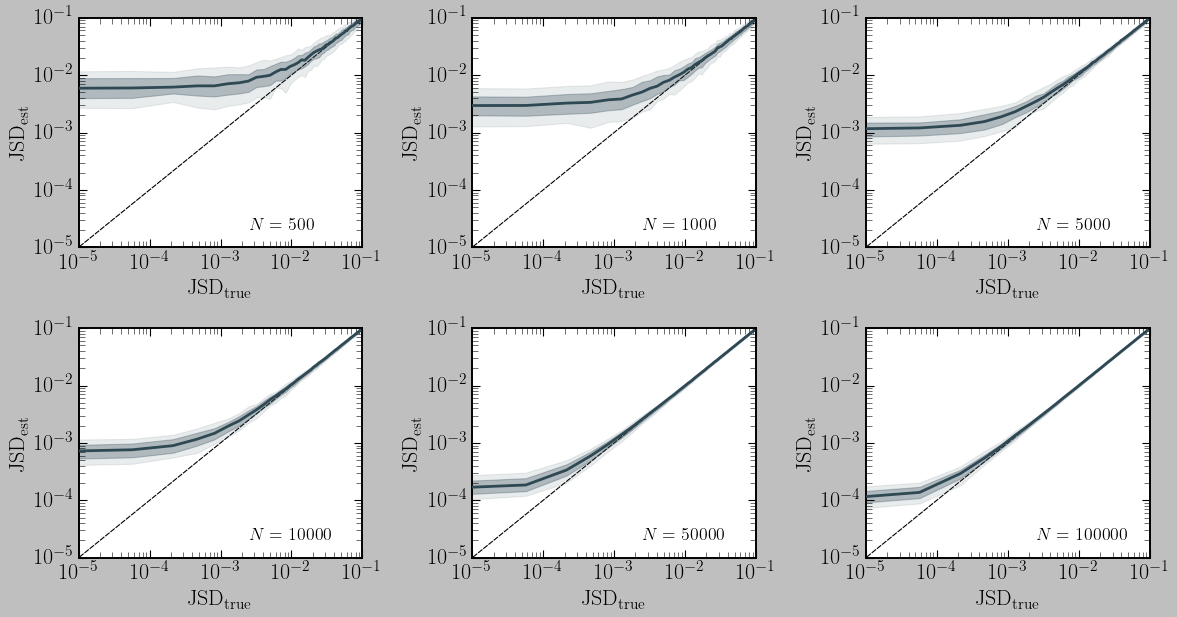

In [26]:
fig = plt.figure(figsize=(15, 8))
for i, N in enumerate(N_arr):
    nbs = bins_arr[i]
    ax = plt.subplot(2, 3, i + 1)
    for j, typ in enumerate(typ_arr):
        true_jsds, est_jsds = load_data(typ=typ, N=N, nbs=nbs)
        if true_jsds is None or est_jsds is None:
            continue
        plt.plot(true_jsds, np.quantile(est_jsds, 0.5, axis=1), zorder=10, c=palette[j])
        plt.fill_between(true_jsds, np.quantile(est_jsds, 0.16, axis=1), np.quantile(est_jsds, 0.84, axis=1), alpha=0.3, linewidths=1.0, color=palette[j])
        plt.fill_between(true_jsds, np.quantile(est_jsds, 0.025, axis=1), np.quantile(est_jsds, 0.975, axis=1), alpha=0.1, linewidths=1.0, color=palette[j])
    plt.plot([1e-6, 1e-1], [1e-6, 1e-1], c='k', ls=(1, (5, 1)), zorder=0, lw=1.0)
    plt.xlim(1e-5, 1e-1)
    plt.ylim(1e-5, 1e-1)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r"$\mathrm{JSD}_\mathrm{true}$")
    plt.ylabel(r"$\mathrm{JSD}_\mathrm{est}$")
    plt.text(0.6, 0.08, rf"$N = {N}$", transform=ax.transAxes)
plt.tight_layout()
plt.savefig('/Users/james/Code/doppel/jsd/JSD_test.pdf')